**PCA on Images**

In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

***Oliv data set is 40 different people, 10 images of each person***

In [3]:
oliv=datasets.fetch_olivetti_faces()

In [4]:
oliv.images
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
#4096 pixel of images
oliv.data.shape

(400, 4096)

***400 different images each of 64X64***

***oliv.data is nothing but these 64X64 images put into faltted, so 400 images***

In [6]:
oliv.images.shape

(400, 64, 64)

In [7]:
#Normal Representation
# fig=plt.figure(figsize=(8,8))
# for i in range(64):
#     ax=fig.add_subplot(8,8,i+1)
#     ax.imshow(oliv.images[i])
# plt.show()    

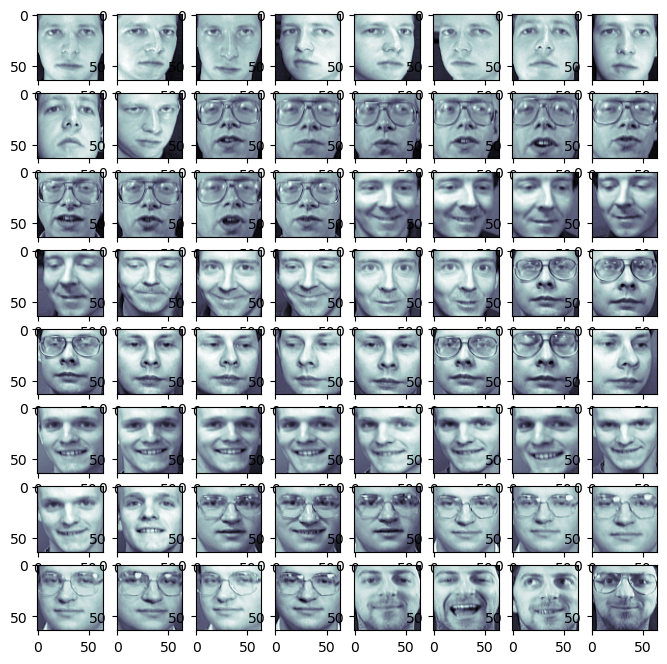

In [8]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()    

In [9]:
x=oliv.data
y=oliv.target

In [10]:
pca=PCA()
pca.fit(x)

PCA()

In [11]:
pca.components_.shape

(400, 4096)

***Finding the optimal n_components***

In [12]:
k=0
# size=len(pca.explained_variance_)
total=sum(pca.explained_variance_)
cSum=0
while(cSum/total<0.95):
    cSum+=pca.explained_variance_[k]
    k=k+1
k

123

In [13]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [14]:
x_t=pca.inverse_transform(transformed_data)
x_t.shape

(400, 4096)

In [15]:
x_approx_images=x_t.reshape((400,64,64))

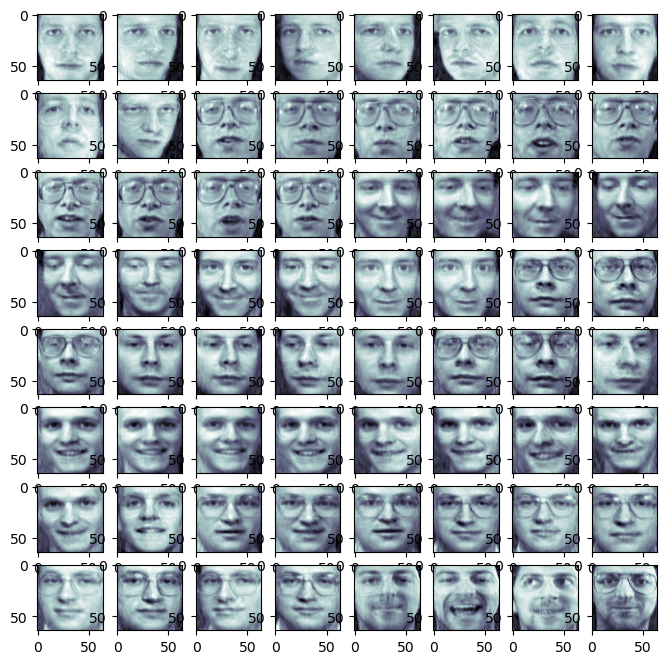

In [16]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()    